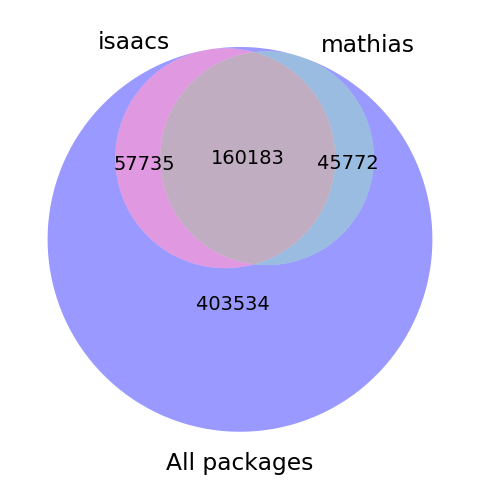

In [9]:
from matplotlib_venn import venn2, venn3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

isaacs = pd.read_json('isaacs-reach.json', typ='series')
setA = set(isaacs)

mathias = pd.read_json('mathias-reach.json', typ='series')
setB = set(mathias)

packages = pd.read_json('latestPackages.json', typ='series')
setC = set(packages)

# print(setA,setB,setC)

plt.figure(figsize=(8,6), dpi=100)
venn3([setA, setB, setC], ('isaacs', 'mathias', 'All packages'))
plt.savefig("top2_reach_maintainer.png")

309674 0.46412299317770345
full reach at maintainer count 44235 with 413853 packages


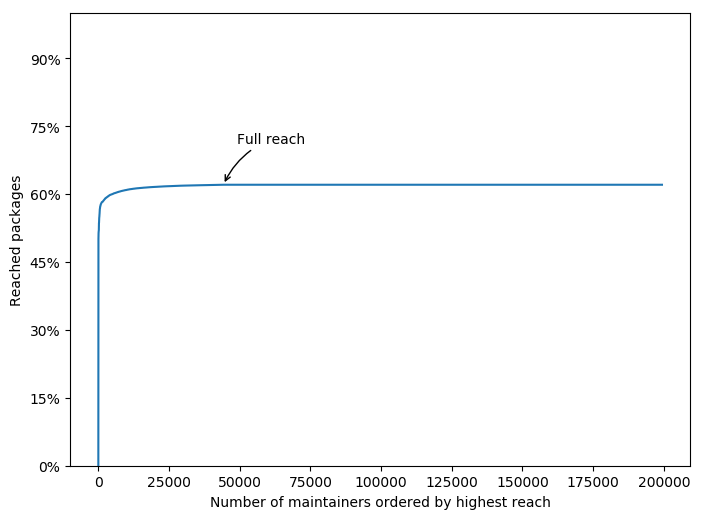

In [4]:
import matplotlib.ticker as mtick

to100Percent = pd.read_json('reachTo100Percent.json', typ='series')

for i, x in to100Percent.iteritems():
    if i > 5:
        amountTop5 = x
        break

print(amountTop5, amountTop5 / 667224)
    

max = 0
index = 0
for i, x in to100Percent.iteritems():
    if x > max:
        max = x
        index = i
        
print('full reach at maintainer count {} with {} packages'.format(index, max))

plt.figure(figsize=(8,6), dpi=100)
plt.plot(to100Percent)
# plt.axvline(index, color='r', linestyle='--')
plt.ylim(0,667224)
plt.xlabel('Number of maintainers ordered by highest reach')
plt.ylabel('Reached packages')

plt.annotate("Full reach", (index, max), xytext=(+10, +30), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.gca().set_yticklabels(['{:.0f}%'.format(x/667224*100) for x in plt.gca().get_yticks()]) 

plt.savefig("complete_reach_maintainer.png")

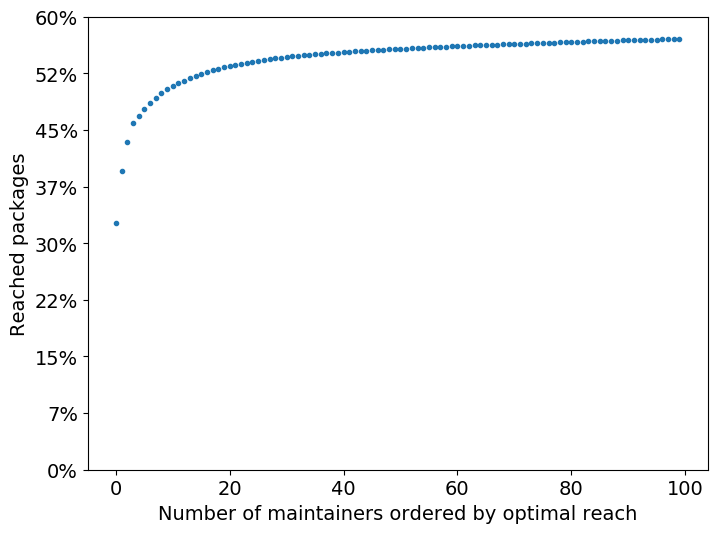

In [10]:
import matplotlib.ticker as mtick
import pandas as pd
import matplotlib.pyplot as plt

ranking = pd.read_json('optimalRanking_2018_top100.json', typ='series')

plt.figure(figsize=(8,6), dpi=100)
plt.plot(ranking["IntersectionCounts"], '.')
plt.ylim(0,400000)
plt.xlabel('Number of maintainers ordered by optimal reach')
plt.ylabel('Reached packages')

plt.gca().set_yticklabels(['{:.0f}%'.format(x/667224*100) for x in plt.gca().get_yticks()]) 

plt.savefig("top100_reach_maintainer.png")

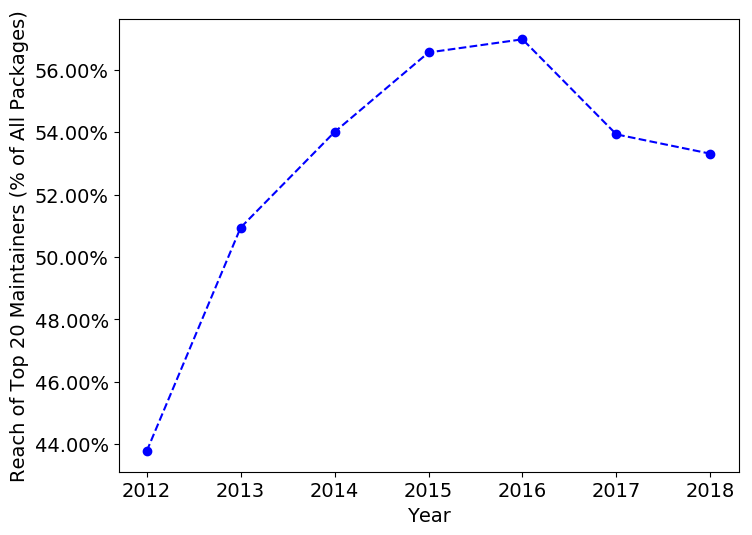

In [8]:
import matplotlib.pyplot as plt

x = [2012,2013,2014,2015,2016,2017,2018]
packageCount = [5165, 18574, 50393, 112373, 218744, 390190, 605079]
reachCount = [2261, 9462, 27216, 63555, 124638, 210433, 322578]

percentage = []

for i in range(7):
    percentage.append(reachCount[i] / packageCount[i])
    
plt.figure(figsize=(8,6), dpi=100)
plt.plot(x, percentage, '--bo')
plt.xlabel('Year')
plt.ylabel('Reach of Top 20 Maintainers (% of All Packages)')

plt.rcParams.update({'font.size': 14})

plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.savefig("top20_maintainer_reach_evolution.png")